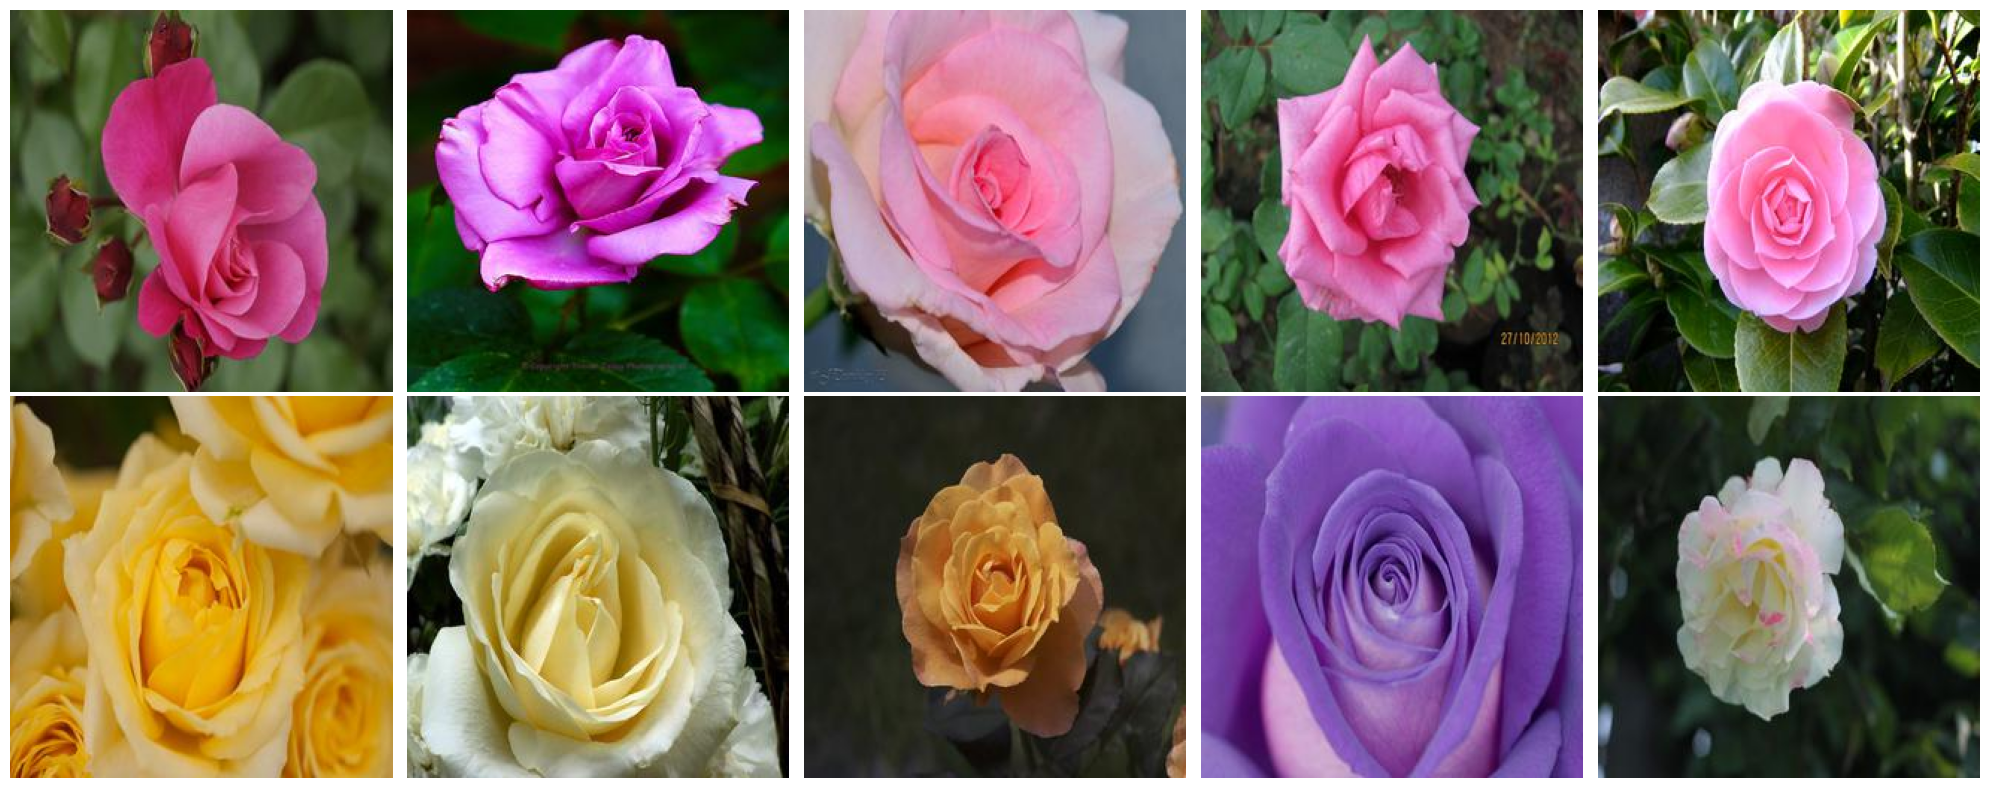

In [7]:
import cv2
import matplotlib.pyplot as plt

# List with 5 pink roses and 5 non-pink roses
flowers_list = [
    "raw_data/flowers/rose/9185768268_1e48d4d119_c.jpg",
    "raw_data/flowers/rose/9230421241_665f294ca3_c.jpg",
    "raw_data/flowers/rose/9692922135_ca989f7f65_c.jpg",
    "raw_data/flowers/rose/8198408482_c7510b0992_c.jpg",
    "raw_data/flowers/rose/8702677054_b916a65bf4_c.jpg",

    "raw_data/flowers/rose/8739679581_9479ac63e4_c.jpg",
    "raw_data/flowers/rose/813873375_32f738bf5a_c.jpg",
    "raw_data/flowers/rose/7826516734_9e794be6af_c.jpg",
    "raw_data/flowers/rose/6836630450_fb4f6eafc8_c.jpg",
    "raw_data/flowers/rose/3622857482_8bb39d0a7f_c.jpg"
]

# Set up a subplot for 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Display all roses in a 2x5 grid
for i, flower in enumerate(flowers_list):
    # Load the image
    img = cv2.imread(flower)

    # Convert from BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Calculate the row and column indices for subplot
    row = i // 5
    col = i % 5

    # Display the image in the appropriate subplot
    axs[row, col].imshow(img_rgb)
    axs[row, col].axis('off')  # Turn off axis numbers and ticks

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import cv2


def get_limits(color):
    c = np.uint8([[color]])  # BGR values
    hsvC = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)

    hue = hsvC[0][0][0]  # Get the hue value

    # Handle red hue wrap-around
    if hue >= 165:  # Upper limit for divided red hue
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([180, 255, 255], dtype=np.uint8)
    elif hue <= 15:  # Lower limit for divided red hue
        lowerLimit = np.array([0, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)
    else:
        lowerLimit = np.array([hue - 10, 100, 100], dtype=np.uint8)
        upperLimit = np.array([hue + 10, 255, 255], dtype=np.uint8)

    return lowerLimit, upperLimit


65536

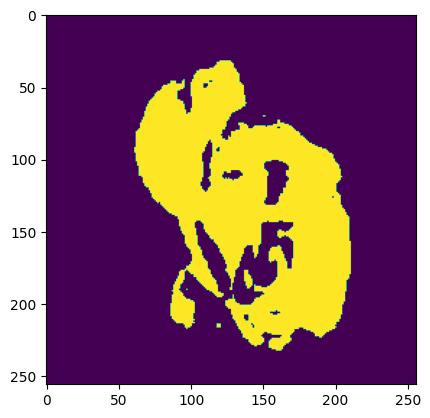

In [18]:
#load pink rose image
img = cv2.imread("raw_data/flowers/rose/9185768268_1e48d4d119_c.jpg")

#define pink in BGR color space
pink = [220, 140, 255]

#convert image from BGR into HSV color space
hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#get limits of pink
lowerHue, upperHue = get_limits(pink)

#define mask
mask = cv2.inRange(hsvImage, lowerHue, upperHue)

plt.imshow(mask)
mask


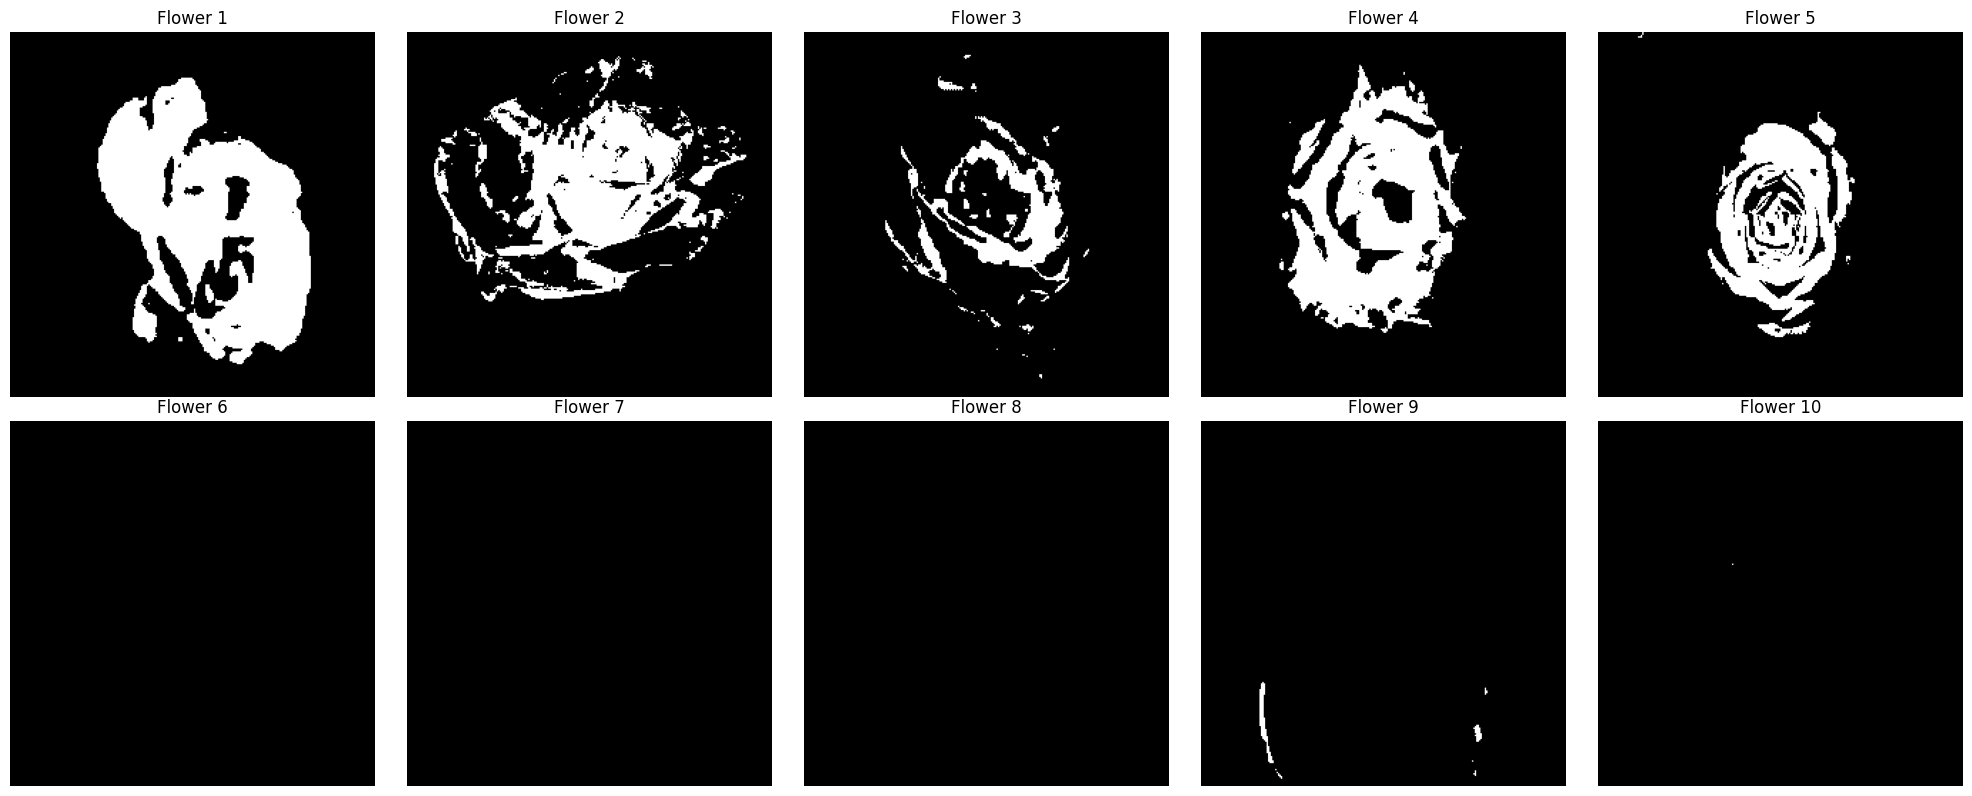

In [24]:
from IPython.display import display, Image

# Set up a subplot for 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

#define pink in BGR color space
pink = [220, 140, 255]

# Display all roses in a 2x5 grid
for i, flower in enumerate(flowers_list):
    # Load the image
    img = cv2.imread(flower)

    # Convert image from BGR into HSV color space
    hsvImage = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Get limits of pink
    lowerHue, upperHue = get_limits(pink)

    # Define mask
    mask = cv2.inRange(hsvImage, lowerHue, upperHue)

    # Save the mask to a temporary file
    cv2.imwrite(f"mask_{i}.png", mask)

    # Calculate the row and column indices for subplot
    row = i // 5
    col = i % 5

    # Display the image using IPython's display function in the subplot
    axs[row, col].imshow(mask, cmap='gray')  # Display the mask using grayscale colormap
    axs[row, col].set_title(f'Flower {i+1}')  # Set a title for each subplot
    axs[row, col].axis('off')  # Turn off axis numbers and ticks

# Adjust layout
plt.tight_layout()
plt.show()
